In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
d=pd.read_csv("/content/Mall_Customers.csv")

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CustomerID          200 non-null    int64
 1   Genre               200 non-null    int64
 2   Age                 200 non-null    int64
 3   Annual_Income_(k$)  200 non-null    int64
 4   Spending_Score      200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [11]:
d.describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [3]:
d.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [6]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
d['Genre']=lr.fit_transform(d['Genre'])

In [23]:
x=d['Genre']
y=d['Spending_Score']

In [5]:
d.shape

(200, 5)

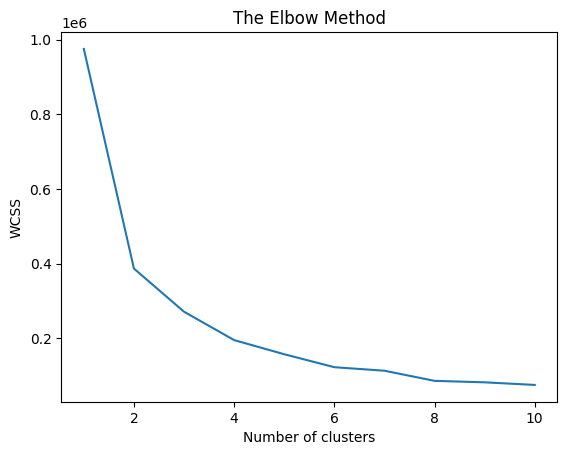

In [15]:
#to find WCSS
#inertia is sum of sq of distance between the centroid and other points
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',random_state=42)
  km.fit(d)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
km.inertia_

75284.7825534327

In [19]:
km.labels_

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8, 4, 2,
       4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 9, 8, 9, 9,
       9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 0, 9, 0, 9, 0, 9,
       9, 0, 9, 9, 0, 0, 0, 0, 0, 9, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 0, 6, 0, 0,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1,
       7, 1], dtype=int32)

/tmp/ipython-input-1773909129.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


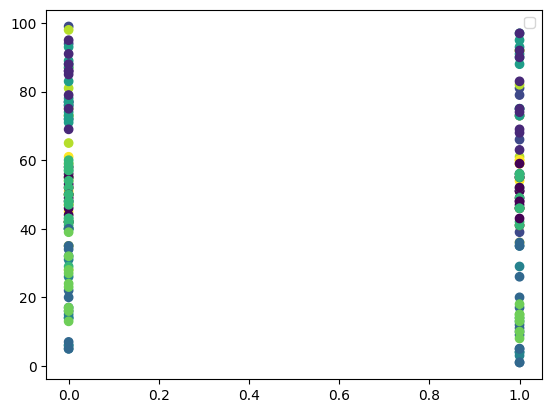

In [26]:
plt.scatter(x,y,c=km.labels_)
plt.legend()
plt.show()